# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv')
cancer_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
cancer_df.drop('ID',axis=1,inplace=True)

In [280]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
cancer_df.shape

(699, 10)

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


#### There are categorical values in 'Bare Nuclei'. We can remove that. There are no missing values in the data.

In [6]:
cancer_df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [284]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

#### There are no missing values in other columns as we checked above.

In [17]:
#cancer_df=cancer_df[pd.to_numeric(cancer_df['Bare Nuclei'], errors='coerce').notnull()]
#cancer_df=cancer_df.convert_objects(convert_numeric=True)

In [286]:
#cancer_df.shape

In [287]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [16]:
#cancer_df[cancer_df['Bare Nuclei'] == '?']['Bare Nuclei'].count()

In [289]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [15]:
cancer_df = cancer_df.replace('?', 0)

In [18]:
cancer_df=cancer_df.convert_objects(convert_numeric=True)

In [11]:
cancer_df['Bare Nuclei'].mean()

3.463519313304721

In [293]:
cancer_df.fillna(cancer_df['Bare Nuclei'].mean(), inplace=True)

In [294]:
cancer_df.shape

(699, 10)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [295]:
# Check for correlation of variable

In [296]:
cancer_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.817653,0.756616,0.712244,0.423170,1.000000


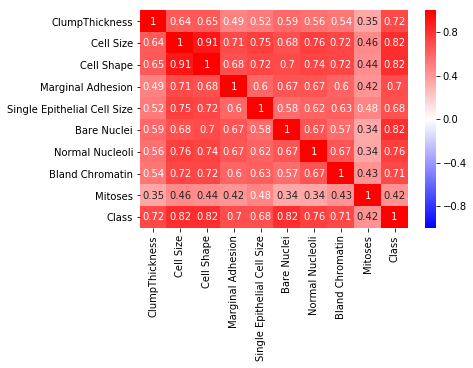

In [297]:
sns.heatmap(cancer_df.corr(),annot=True,cmap='bwr',vmax=1,vmin=-1)

* Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin.
* Target variable shows high correlation with most of these variables.
* Mitoses has low correlation with target variable and all other variables.

In [298]:
#Let us check for pair plots

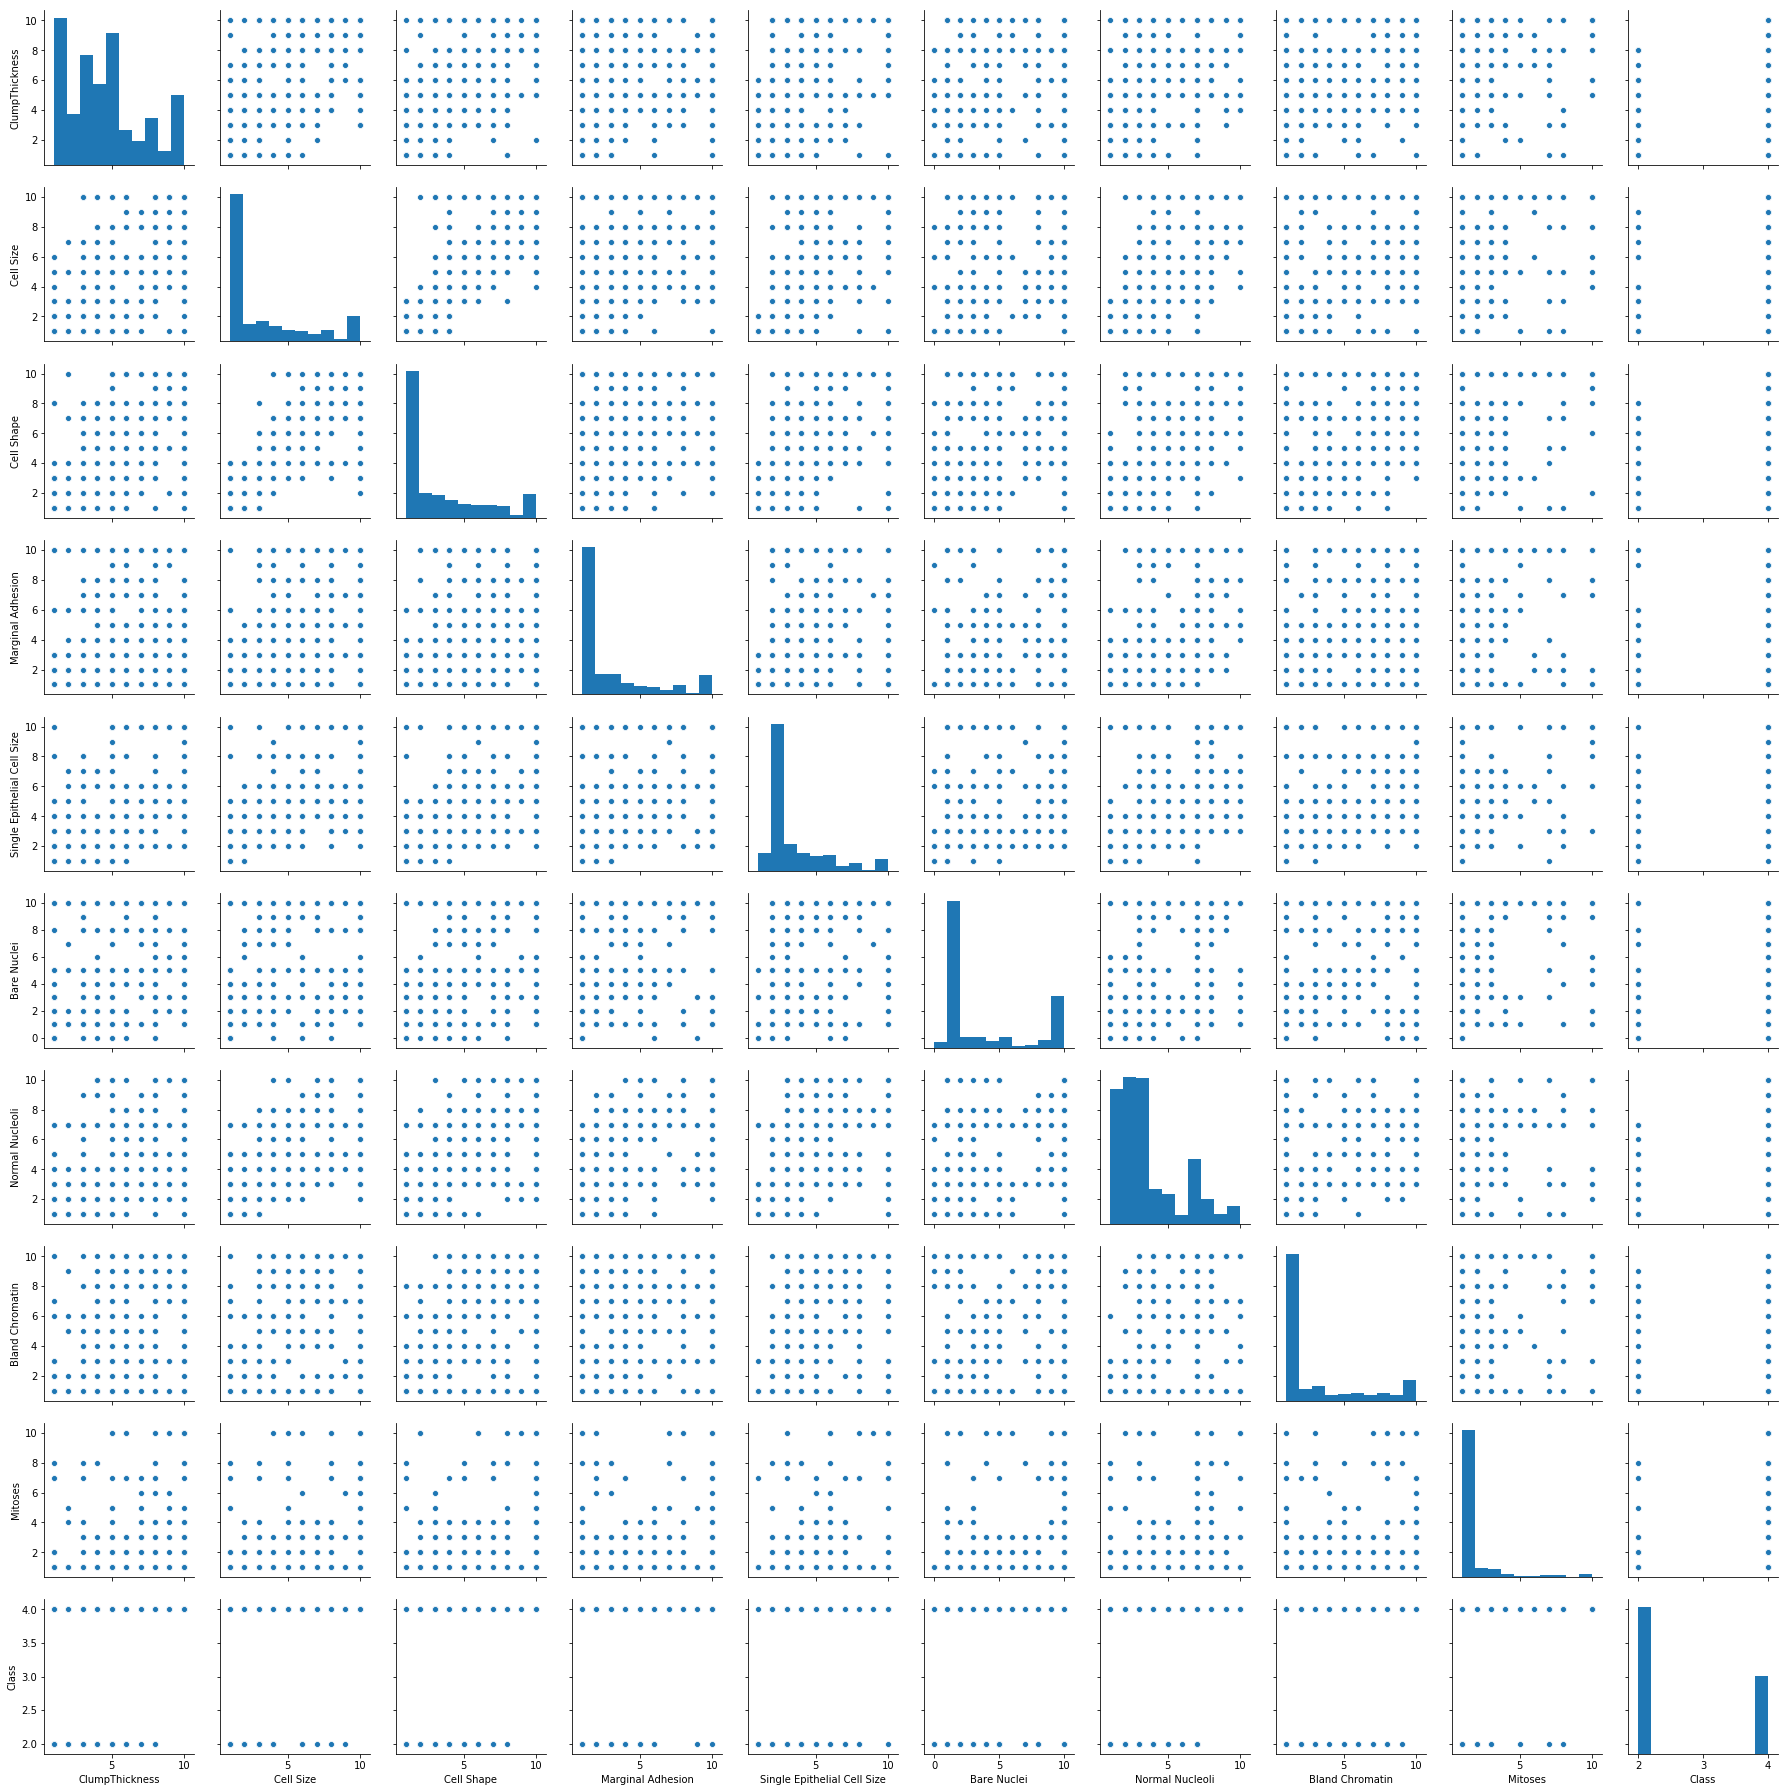

In [131]:
sns.pairplot(cancer_df)

* Relationship between variables shows come correlation. 
* Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is between 1 to 10.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [299]:
# We could see most of the outliers are now removed.

In [300]:
# Let us calculate IQR
Q1=cancer_df.quantile(0.25)
Q3=cancer_df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

ClumpThickness                 4.0
Cell Size                      4.0
Cell Shape                     4.0
Marginal Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Normal Nucleoli                3.0
Bland Chromatin                3.0
Mitoses                        0.0
Class                          2.0
dtype: float64


In [301]:
### We could see Mitoses has 0 IQR.Hence there is no varliability in 50%. Hence we can remove that.

In [302]:
# Let us remove outliers using IQR
cancer_df_1 = cancer_df[~((cancer_df < (Q1 - 1.5 * IQR)) |(cancer_df > (Q3 + 1.5 * IQR))).any(axis=1)]
cancer_df_1.shape

(504, 10)

In [303]:
cancer_std=cancer_df_1.drop(['Class','Mitoses'],axis=1).apply(zscore)

In [304]:
cancer_std.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.713835,-0.442571,-0.511502,-0.455137,-0.267908,-0.422444,0.322968,-0.373795
1,0.713835,1.209693,1.060431,2.467019,4.696263,2.981121,0.322968,0.339814
2,-0.191254,-0.442571,-0.511502,-0.455137,-0.267908,-0.044270,0.322968,-0.373795
3,1.166379,3.412711,3.156341,-0.455137,0.724927,0.712077,0.322968,3.907859
4,0.261290,-0.442571,-0.511502,1.005941,-0.267908,-0.422444,0.322968,-0.373795


# Q6 Create a covariance matrix for identifying Principal components

In [305]:
# PCA
# Step 1 - Create covariance matrix


In [306]:
cov_matrix = np.cov(cancer_std, rowvar=False)
print('Covariance matrix of cancer_data: \n%s' %cov_matrix)

Covariance matrix of cancer_data: 
[[1.00198807 0.55340341 0.56337768 0.42084137 0.39260168 0.49336943
  0.43026395 0.41438267]
 [0.55340341 1.00198807 0.90341002 0.66045709 0.65303246 0.71577001
  0.62649642 0.66951279]
 [0.56337768 0.90341002 1.00198807 0.63199757 0.62699584 0.72462551
  0.62987221 0.63505046]
 [0.42084137 0.66045709 0.63199757 1.00198807 0.52814522 0.64549725
  0.48462521 0.52186222]
 [0.39260168 0.65303246 0.62699584 0.52814522 1.00198807 0.59796509
  0.47471794 0.51378159]
 [0.49336943 0.71577001 0.72462551 0.64549725 0.59796509 1.00198807
  0.64458726 0.51618098]
 [0.43026395 0.62649642 0.62987221 0.48462521 0.47471794 0.64458726
  1.00198807 0.52509275]
 [0.41438267 0.66951279 0.63505046 0.52186222 0.51378159 0.51618098
  0.52509275 1.00198807]]


# Q7 Identify eigen values and eigen vector

In [307]:
# Step 2- Get eigen values and eigen vector

In [308]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(cancer): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(cancer): \n%s' %eigenvalues)

Eigenvectors of Cov(cancer): 
[[-2.90565172e-01  1.11140634e-02  9.02000193e-01 -8.86195938e-03
  -2.37236402e-01 -5.35823812e-02 -2.01088472e-01  4.66553341e-02]
 [-4.06295635e-01  7.28217209e-01 -2.76139711e-02 -1.89154637e-01
   5.02829646e-01 -4.06270062e-04 -5.57506355e-02  1.10161677e-01]
 [-4.01799296e-01 -6.79751454e-01  2.50158191e-02 -1.46074060e-01
   5.91889994e-01 -2.62209668e-02 -1.64311148e-02  5.69260842e-02]
 [-3.40764412e-01 -4.70319748e-02 -2.07998565e-01 -2.92450083e-01
  -2.98738012e-01  6.81717428e-01 -3.29306237e-01 -3.00751566e-01]
 [-3.32772328e-01 -3.63504394e-02 -3.30110732e-01 -1.19155498e-01
  -3.23401285e-01 -6.83927643e-01 -4.38087505e-01 -2.24504070e-02]
 [-3.73553039e-01  4.32114955e-02 -5.84685785e-02  8.02242956e-01
   4.24329865e-02  5.78678219e-03  8.86885783e-02 -4.49309303e-01]
 [-3.34448490e-01  3.75522950e-03 -4.00137255e-03 -3.46732969e-01
  -2.72309379e-01 -1.46830490e-01  7.92141739e-01 -2.11400609e-01]
 [-3.32862721e-01 -4.58196389e-02 -1.71

# Q8 Find variance and cumulative variance by each eigen vector

In [309]:
# Let us first sort the eigen values in descending order
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[5.102266829107415, 0.6473675900212862, 0.5386039506747757, 0.526093991701743, 0.4729905275181346, 0.35884887075443994, 0.27425865557908474, 0.09547415720773765]


In [310]:
Total = sum(eigenvalues)
var_explained = [(i / Total) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)

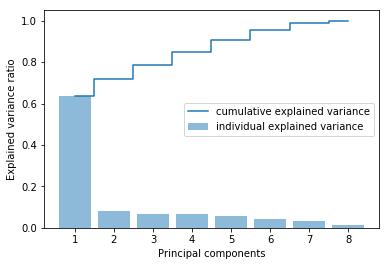

In [311]:
# Let us plot it.
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

* The plot shows that the first principal component alone accounts for more than 60 percent of the variance. 

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [312]:
pcamodel = PCA(n_components=8)
pcamodel.fit(cancer_std)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [313]:
print(pcamodel.components_)

[[ 2.90565172e-01  4.06295635e-01  4.01799296e-01  3.40764412e-01
   3.32772328e-01  3.73553039e-01  3.34448490e-01  3.32862721e-01]
 [ 9.02000193e-01 -2.76139711e-02  2.50158191e-02 -2.07998565e-01
  -3.30110732e-01 -5.84685785e-02 -4.00137255e-03 -1.71278268e-01]
 [-2.01088472e-01 -5.57506355e-02 -1.64311148e-02 -3.29306237e-01
  -4.38087505e-01  8.86885783e-02  7.92141739e-01  1.43065904e-01]
 [ 4.66553341e-02  1.10161677e-01  5.69260842e-02 -3.00751566e-01
  -2.24504070e-02 -4.49309303e-01 -2.11400609e-01  8.03070677e-01]
 [ 5.35823812e-02  4.06270062e-04  2.62209668e-02 -6.81717428e-01
   6.83927643e-01 -5.78678219e-03  1.46830490e-01 -2.05798133e-01]
 [-2.37236402e-01  5.02829646e-01  5.91889994e-01 -2.98738012e-01
  -3.23401285e-01  4.24329865e-02 -2.72309379e-01 -2.66010761e-01]
 [-8.86195938e-03 -1.89154637e-01 -1.46074060e-01 -2.92450083e-01
  -1.19155498e-01  8.02242956e-01 -3.46732969e-01  2.81534655e-01]
 [ 1.11140634e-02  7.28217209e-01 -6.79751454e-01 -4.70319748e-02
  -

In [314]:
df_comp = pd.DataFrame(pcamodel.components_,columns=cancer_std.columns.values)

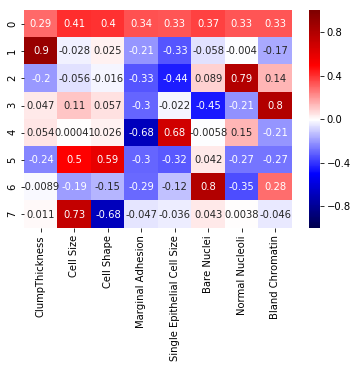

In [315]:
sns.heatmap(df_comp,cmap='seismic', annot=True,vmax=1,vmin=-1)

In [316]:
var = pcamodel.explained_variance_ratio_

var.round(decimals=5)

array([0.63652, 0.08076, 0.06719, 0.06563, 0.05901, 0.04477, 0.03421,
       0.01191])

* First dimension is giving us 63% of variance.

In [317]:
sum(var)

0.9999999999999999

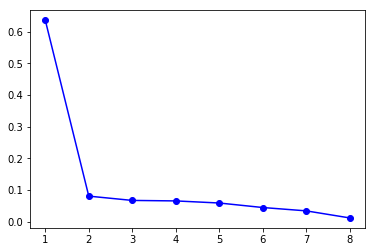

In [318]:
plt.plot([1,2,3,4,5,6,7,8], var,'-bo' )

In [319]:
pcamodel.transform(cancer_std)

array([[-5.96378830e-01,  9.13842013e-01,  3.21673643e-01, ...,
        -4.78468690e-01, -2.38989653e-01,  6.45703575e-02],
       [ 4.86318174e+00, -1.66021807e+00, -2.52934473e+00, ...,
        -1.24103289e+00,  7.04157192e-01, -4.25517143e-03],
       [-7.18098001e-01,  7.53407465e-02,  5.37216208e-01, ...,
        -2.47701709e-01,  7.24185655e-02,  7.08526075e-02],
       ...,
       [-1.27813592e+00,  1.02462240e-01, -4.88180630e-01, ...,
         7.72154742e-02,  2.03182760e-01,  4.98091460e-02],
       [-8.06480180e-01, -2.47394253e-01, -8.89589150e-01, ...,
        -2.27821311e-01,  3.88268476e-01,  3.00606498e-02],
       [-1.40962951e+00, -3.05732748e-01, -3.97179201e-01, ...,
         1.84575440e-01,  2.07193189e-01,  4.47795407e-02]])

In [320]:
cancerdata=pd.DataFrame(pcamodel.transform(cancer_std))
cancerdata.head()

,0,1,2,3,4,5,6,7
0,-0.596379,0.913842,0.321674,-0.080321,0.278495,-0.478469,-0.238990,0.064570
1,4.863182,-1.660218,-2.529345,-1.755287,1.556878,-1.241033,0.704157,-0.004255
2,-0.718098,0.075341,0.537216,-0.292466,0.227810,-0.247702,0.072419,0.070853
3,4.754631,0.179898,0.233701,3.480723,0.191789,2.111772,0.489273,0.200611
4,-0.229989,0.201745,-0.068467,-0.540857,-0.741796,-0.807588,-0.662272,-0.009177


In [321]:
PCA_cancer=cancerdata.loc[:,0]

In [322]:
PCA_cancer.head()

0   -0.596379
1    4.863182
2   -0.718098
3    4.754631
4   -0.229989
Name: 0, dtype: float64

In [323]:
PCA_cancer=pd.DataFrame(PCA_cancer)

In [324]:
PCA_cancer=PCA_cancer.rename(columns={0:'CancerAttributes'})

In [325]:
Cancer_Final = pd.DataFrame.join(cancer_df,PCA_cancer)
Cancer_Final.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,CancerAttributes
0,5,1,1,1,2,1,3,1,1,2,-0.596379
1,5,4,4,5,7,10,3,2,1,2,4.863182
2,3,1,1,1,2,2,3,1,1,2,-0.718098
3,6,8,8,1,3,4,3,7,1,2,4.754631
4,4,1,1,3,2,1,3,1,1,2,-0.229989


# Q10 Find correlation between components and features

In [326]:
Cancer_Final.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,CancerAttributes
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001,0.024939
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904,0.056807
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934,0.062070
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800,0.060175
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785,0.048569
Bare Nuclei,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653,0.055294
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616,0.107119
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244,0.024064
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170,0.053702
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.817653,0.756616,0.712244,0.423170,1.000000,0.020949


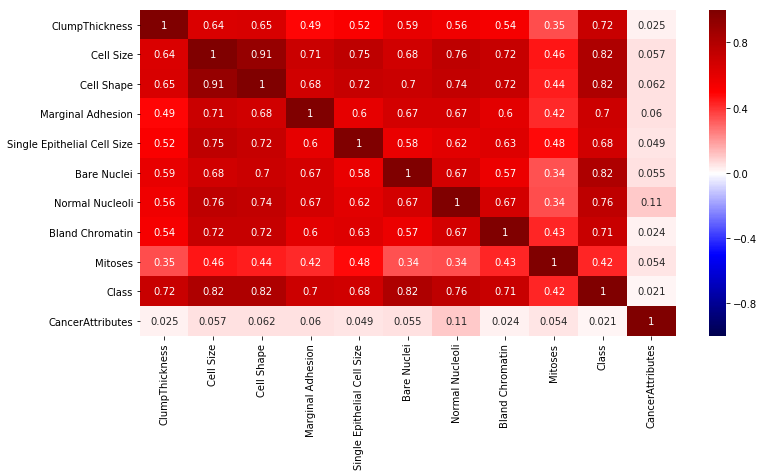

In [328]:
plt.figure(figsize=(12,6))
sns.heatmap(Cancer_Final.corr(),annot=True,cmap='seismic',vmax=1,vmin=-1)

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [334]:
jokes_df=pd.read_csv('C:\\Rohit\\PGP AIML\\Lab\\jokes.csv')
jokes_df.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [354]:
ratings = jokes_df.iloc[:200,1:]
ratings.shape

(200, 100)

In [355]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [356]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 100 columns):
Joke1      200 non-null float64
Joke2      200 non-null float64
Joke3      200 non-null float64
Joke4      200 non-null float64
Joke5      200 non-null float64
Joke6      200 non-null float64
Joke7      200 non-null float64
Joke8      200 non-null float64
Joke9      200 non-null float64
Joke10     200 non-null float64
Joke11     200 non-null float64
Joke12     200 non-null float64
Joke13     200 non-null float64
Joke14     200 non-null float64
Joke15     200 non-null float64
Joke16     200 non-null float64
Joke17     200 non-null float64
Joke18     200 non-null float64
Joke19     200 non-null float64
Joke20     200 non-null float64
Joke21     200 non-null float64
Joke22     200 non-null float64
Joke23     200 non-null float64
Joke24     200 non-null float64
Joke25     200 non-null float64
Joke26     200 non-null float64
Joke27     200 non-null float64
Joke28     200 non-null float6

# Q22 Change the column indices from 0 to 99

In [357]:
ratings.columns = pd.Index(np.arange(100)).astype(str)

In [358]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [360]:
ratings.replace(99,0).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [398]:
scaler = StandardScaler().fit(ratings)
ratings_diff = scaler.transform(ratings)
ratings_diff=pd.DataFrame(ratings_diff)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.834017,-0.263026,-0.942683,-1.066125,-1.380394,-0.883915,-1.785253,0.877475,-1.031886,-0.593006,...,-1.397875,0.740224,0.773171,0.772626,0.740124,0.740442,-1.393526,0.707782,0.789401,0.708077
1,-0.569744,-0.499046,-0.603680,-0.816405,-0.432101,-0.909860,-0.160595,-1.083559,-0.667499,-0.207319,...,-1.397875,-1.460133,-1.361107,-1.157292,-1.383886,-1.416016,-1.210820,-1.403709,-1.358070,-1.416331
2,1.538226,2.081847,1.356697,1.069553,1.672963,-0.486467,1.578074,1.929134,1.171165,2.269575,...,0.700489,0.740224,0.773171,-1.131458,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
3,1.538226,-0.274463,1.356697,1.069553,0.339079,-0.511294,-0.532913,1.298139,1.171165,-0.410922,...,0.700489,0.740224,0.773171,-1.312507,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
4,-0.471585,-0.371678,-0.826508,-1.010920,0.257903,-0.658016,1.223570,0.968206,-0.857649,-0.303603,...,-1.346169,-1.237240,-1.263088,-1.213830,-1.257118,-1.337339,-1.209769,-1.270805,-1.230868,-1.404834


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [399]:
ratings_diff=ratings_diff.mean()

In [405]:
ratings_diff.sort_values(ascending=False).head(10).index

Int64Index([87, 84, 3, 95, 72, 70, 93, 83, 96, 63], dtype='int64')